In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels = []
filename = 'labels.txt'
with open(filename, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000021753228030>

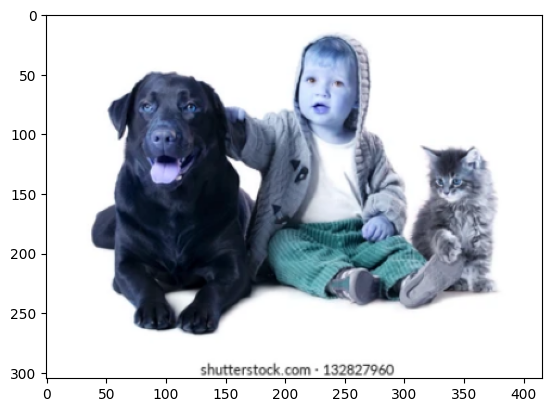

In [9]:
img = cv2.imread('exmplae.png')
plt.imshow(img)

In [10]:
classIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [11]:
print(classIndex, confidence, bbox)

[17 18  1] [0.7776055 0.7692817 0.7530692] [[298 106  80 139]
 [ 44  51 136 216]
 [144  14 169 239]]


In [12]:
fontscale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, box in zip(classIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, box, (0, 255, 0), 2)
    cv2.putText(img, classLabels[classInd - 1], (box[0] + 10, box[1] + 40), font, fontScale = fontscale, color = (0, 0, 255), thickness = 3)

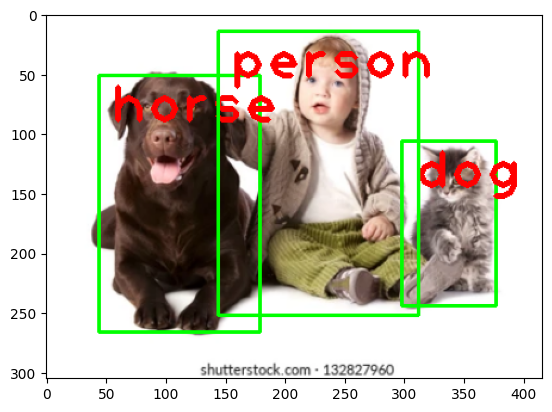

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture("Busypeople.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Can't open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    classInd, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(classInd)

    if len(classInd) != 0:
        for ClassInd, conf, boxes in zip(classInd.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, tuple(boxes), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40),
                            font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[ 1  1  1 10]
[ 1  1  1  1 10]
[ 1  1  1  1  8 10]
[ 1  1  1  1 10]
[ 1  1  1  1  1 10]
[ 1  1  1  1 10  8]
[ 1  1  1  8 10]
[ 1  1  1 10  6  8]
[ 1  6  8  1  1 10]
[ 1  8  1  6 10  1]
[ 1  8  6  1 10  1  1  8]
[ 1  8  6  1  1  1  1 10]
[ 1  8  6  1  1  1 10  1  1]
[ 1  8  1  1  6  1  1 10  1]
[ 1  1  6  1  1  1 10  1]
[ 6  1  1  1  1 10  8  1]
[ 6  1  1  1  8 10  1  1]
[ 6  1  1  1  8  1  1 10]
[ 6  1  1  8  1  1  1 10]
[ 6  1  1  1  1 10]
[ 1  6  1  1 10  1]
[ 1  1  1  1 10  8  6]
[ 1  1  1 10  1  8  1  6  1]
[ 1  1  1 10  1  1]
[ 1  1  1 10  6]
[ 1 10  1  1]
[ 1  1 10  1  1]
[ 1  1 10  1  1]
[ 1  1  1 10  1  1]
[ 1 10  1  1]
[ 1  1  1 10  1]
[ 1  1 10  1  1]
[ 1  1 10  1  1]
[ 1  1  1 10]
[ 1  1 10  1 27]
[ 1 27  1 10  1]
[ 1  1 10 27  1  1]
[ 1  1  1 10]
[ 1  1  1 10]
[ 1  1  1 10]
[ 1  1  1 10  1  1  1]
[ 1  1  1  8 10  1  1]
[ 1  1  1  1 10  8  1  1]
[ 1  1  1  1  1  1 10]
[ 1  1  1  1 10  1  1  1  1]
[ 1  1  1 10  1]
[ 1  1  1 10  1  8  1]
[ 1  1  6 10  1  1  1]
[ 1  1  1 10  1 

In [ ]:
cap = cv2.VideoCapture("Busypeople")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Can't open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    classInd, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(classInd)

    if len(classInd) != 0:
        for ClassInd, conf, boxes in zip(classInd.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, tuple(boxes), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40),
                            font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
